# 1- IMPORTAR LIBRERÍAS

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter
import nltk

In [22]:
# Descargar recursos de NLTK
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
# Configuración
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


# 2 - CARGAR DATOS

In [24]:
print("📂 Cargando dataset...")

# IMPORTANTE: Asegúrate de subir el archivo CSV a Colab primero
try:
    df = pd.read_csv('/content/dataset_sentimientos_ecom.csv')
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
except FileNotFoundError:
    print("❌ ERROR: Archivo no encontrado")
    print("👉 Sube el archivo 'dataset_sentimientos_eco_Cristo.csv' a Colab")
    print("   Usa el botón de carpeta 📁 en el panel izquierdo")

📂 Cargando dataset...
✅ Dataset cargado exitosamente
📊 Dimensiones: 1000 filas x 4 columnas


3 - EXPLORACIÓN INICIAL

In [25]:
print("\n" + "="*70)
print("📊 EXPLORACIÓN INICIAL DE DATOS")
print("="*70)

# Información general
print("\n1️⃣ INFORMACIÓN DEL DATASET:")
print(df.info())

# Primeras filas
print("\n2️⃣ PRIMERAS 10 FILAS:")
print(df.head(10))

# Estadísticas descriptivas
print("\n3️⃣ ESTADÍSTICAS DE CONFIANZA:")
print(df['confianza'].describe())

# Verificar valores nulos
print("\n4️⃣ VALORES NULOS:")
print(df.isnull().sum())

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\n5️⃣ DUPLICADOS: {duplicados}")


📊 EXPLORACIÓN INICIAL DE DATOS

1️⃣ INFORMACIÓN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   texto        1000 non-null   object 
 2   sentimiento  1000 non-null   object 
 3   confianza    1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None

2️⃣ PRIMERAS 10 FILAS:
   id                                             texto sentimiento  confianza
0   1     El servicio al cliente es pésimo, no ayudan 😊    negativo       0.85
1   2    Vino incompleto y faltaban piezas importantes.    negativo       0.82
2   3     Estoy esperando reembolso desde hace semanas!    negativo       0.96
3   4             Tardanza excesiva y producto mediocre    negativo       0.97
4   5         No cumple con lo prometido, decepcionante    negativo       0.86
5   6          

# 5: ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS


📈 ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS

📊 Distribución absoluta:
sentimiento
positivo    400
negativo    350
neutro      250
Name: count, dtype: int64

📊 Distribución porcentual:
sentimiento
positivo    40.0
negativo    35.0
neutro      25.0
Name: proportion, dtype: float64


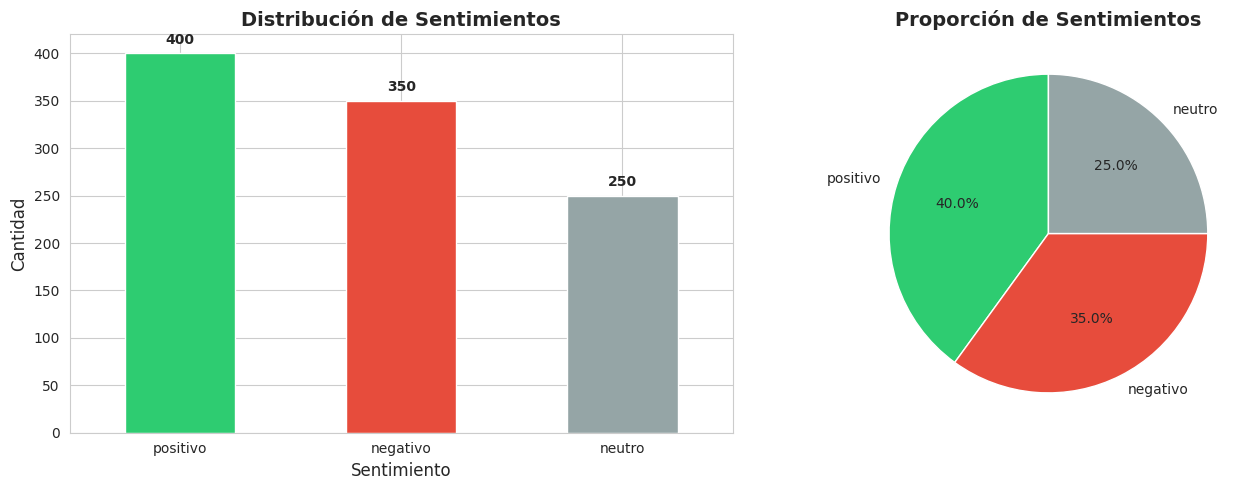


✅ Gráfico guardado: 'distribucion_sentimientos.png'


In [26]:
print("\n" + "="*70)
print("📈 ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS")
print("="*70)

# Conteo por sentimiento
print("\n📊 Distribución absoluta:")
conteo = df['sentimiento'].value_counts()
print(conteo)

print("\n📊 Distribución porcentual:")
porcentaje = df['sentimiento'].value_counts(normalize=True) * 100
print(porcentaje.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
conteo.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[0].set_title('Distribución de Sentimientos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Añadir valores sobre las barras
for i, v in enumerate(conteo):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
axes[1].pie(conteo, labels=conteo.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Proporción de Sentimientos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('distribucion_sentimientos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'distribucion_sentimientos.png'")


# 5 - ANÁLISIS DE LONGITUD DE TEXTOS


📏 ANÁLISIS DE LONGITUD DE TEXTOS

📊 ESTADÍSTICAS DE LONGITUD (CARACTERES):
             count       mean       std   min    25%   50%   75%   max
sentimiento                                                           
negativo     350.0  40.557143  4.509893  29.0  38.00  40.0  44.0  52.0
neutro       250.0  37.612000  5.148932  28.0  34.25  37.0  41.0  49.0
positivo     400.0  39.747500  5.956715  31.0  36.00  39.0  41.0  58.0

📊 ESTADÍSTICAS DE LONGITUD (PALABRAS):
             count      mean       std  min  25%  50%  75%   max
sentimiento                                                     
negativo     350.0  6.554286  1.035845  4.0  6.0  7.0  7.0   9.0
neutro       250.0  6.284000  1.110078  4.0  6.0  6.0  7.0  10.0
positivo     400.0  6.142500  1.133758  3.0  5.0  6.0  7.0   9.0


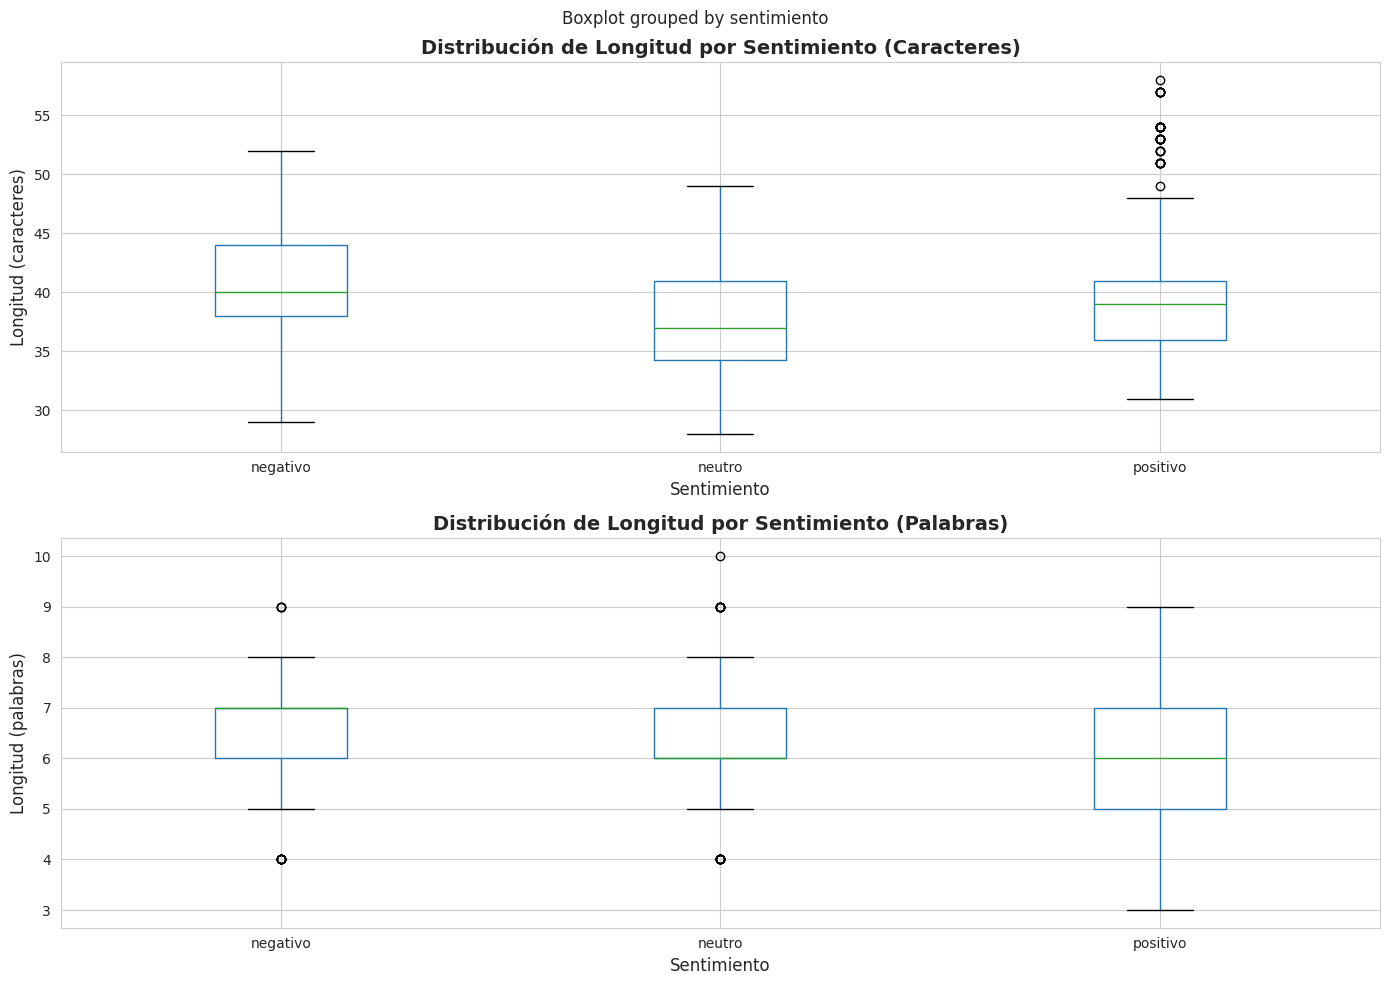


✅ Gráfico guardado: 'analisis_longitud_textos.png'


In [27]:
print("\n" + "="*70)
print("📏 ANÁLISIS DE LONGITUD DE TEXTOS")
print("="*70)

# Calcular longitudes
df['longitud_caracteres'] = df['texto'].str.len()
df['longitud_palabras'] = df['texto'].str.split().str.len()

# Estadísticas por sentimiento
print("\n📊 ESTADÍSTICAS DE LONGITUD (CARACTERES):")
print(df.groupby('sentimiento')['longitud_caracteres'].describe())

print("\n📊 ESTADÍSTICAS DE LONGITUD (PALABRAS):")
print(df.groupby('sentimiento')['longitud_palabras'].describe())

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Distribución por caracteres
df.boxplot(column='longitud_caracteres', by='sentimiento', ax=axes[0])
axes[0].set_title('Distribución de Longitud por Sentimiento (Caracteres)',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Longitud (caracteres)', fontsize=12)
plt.sca(axes[0])
plt.xticks(rotation=0)

# Distribución por palabras
df.boxplot(column='longitud_palabras', by='sentimiento', ax=axes[1])
axes[1].set_title('Distribución de Longitud por Sentimiento (Palabras)',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentimiento', fontsize=12)
axes[1].set_ylabel('Longitud (palabras)', fontsize=12)
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('analisis_longitud_textos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'analisis_longitud_textos.png'")


6 - FUNCIÓN DE LIMPIEZA DE TEXTO

In [28]:
print("\n" + "="*70)
print("🧹 CREANDO FUNCIÓN DE LIMPIEZA DE TEXTO")
print("="*70)

def limpiar_texto(texto):
    """
    Limpia y normaliza el texto para procesamiento

    Pasos:
    1. Convierte a minúsculas
    2. Elimina URLs
    3. Elimina menciones y hashtags
    4. Elimina emojis y símbolos especiales
    5. Elimina números
    6. Elimina puntuación
    7. Elimina espacios múltiples
    """
    if not isinstance(texto, str):
        return ""

    # Minúsculas
    texto = texto.lower()

    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)

    # Eliminar menciones y hashtags
    texto = re.sub(r'@\w+|#\w+', '', texto)

    # Eliminar emojis y símbolos
    texto = re.sub(r'[^\w\s]', '', texto)

    # Eliminar números
    texto = re.sub(r'\d+', '', texto)

    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Aplicar limpieza
print("🔄 Aplicando limpieza a todos los textos...")
df['texto_limpio'] = df['texto'].apply(limpiar_texto)

# Mostrar ejemplos
print("\n📝 EJEMPLOS DE LIMPIEZA:")
print("="*70)
for i in range(5):
    print(f"\nEjemplo {i+1}:")
    print(f"Original:  {df.iloc[i]['texto']}")
    print(f"Limpio:    {df.iloc[i]['texto_limpio']}")

print("\n✅ Limpieza completada")

# ============================================================================
# CELDA 8: ELIMINACIÓN DE STOPWORDS
# ============================================================================
print("\n" + "="*70)
print("🚫 ELIMINACIÓN DE STOPWORDS (PALABRAS VACÍAS)")
print("="*70)

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Añadir palabras personalizadas si es necesario
palabras_adicionales = {'si', 'no', 'muy', 'mas', 'pero'}
stop_words.update(palabras_adicionales)

print(f"📊 Total de stopwords: {len(stop_words)}")
print(f"Ejemplos: {list(stop_words)[:20]}")

def eliminar_stopwords(texto):
    """Elimina palabras vacías del texto"""
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if p not in stop_words and len(p) > 2]
    return ' '.join(palabras_filtradas)

# Aplicar eliminación de stopwords
print("\n🔄 Eliminando stopwords...")
df['texto_procesado'] = df['texto_limpio'].apply(eliminar_stopwords)

# Verificar que no quedaron textos vacíos
textos_vacios = (df['texto_procesado'].str.len() == 0).sum()
print(f"\n📊 Textos vacíos después del procesamiento: {textos_vacios}")

if textos_vacios > 0:
    print("⚠️  Reemplazando textos vacíos con versión limpia...")
    df.loc[df['texto_procesado'].str.len() == 0, 'texto_procesado'] = \
        df.loc[df['texto_procesado'].str.len() == 0, 'texto_limpio']

# Mostrar ejemplos
print("\n📝 EJEMPLOS DE PROCESAMIENTO:")
print("="*70)
for i in range(5):
    print(f"\nEjemplo {i+1}:")
    print(f"Limpio:      {df.iloc[i]['texto_limpio']}")
    print(f"Procesado:   {df.iloc[i]['texto_procesado']}")

print("\n✅ Stopwords eliminadas")


🧹 CREANDO FUNCIÓN DE LIMPIEZA DE TEXTO
🔄 Aplicando limpieza a todos los textos...

📝 EJEMPLOS DE LIMPIEZA:

Ejemplo 1:
Original:  El servicio al cliente es pésimo, no ayudan 😊
Limpio:    el servicio al cliente es pésimo no ayudan

Ejemplo 2:
Original:  Vino incompleto y faltaban piezas importantes.
Limpio:    vino incompleto y faltaban piezas importantes

Ejemplo 3:
Original:  Estoy esperando reembolso desde hace semanas!
Limpio:    estoy esperando reembolso desde hace semanas

Ejemplo 4:
Original:  Tardanza excesiva y producto mediocre
Limpio:    tardanza excesiva y producto mediocre

Ejemplo 5:
Original:  No cumple con lo prometido, decepcionante
Limpio:    no cumple con lo prometido decepcionante

✅ Limpieza completada

🚫 ELIMINACIÓN DE STOPWORDS (PALABRAS VACÍAS)
📊 Total de stopwords: 315
Ejemplos: ['estaba', 'estuve', 'esta', 'tuviera', 'éramos', 'tuvieseis', 'tuvieran', 'que', 'o', 'seréis', 'pero', 'habré', 'habrán', 'teníais', 'un', 'tuvieses', 'fuese', 'ellas', 'fueseis', 'te

# 8 - ANÁLISIS DE PALABRAS MÁS FRECUENTES


📊 ANÁLISIS DE PALABRAS MÁS FRECUENTES

🔹 TOP 15 PALABRAS - POSITIVO:
   producto: 114
   calidad: 67
   compra: 46
   perfecto: 36
   excelente: 36
   bien: 33
   problema: 26
   mejor: 25
   resistente: 24
   justo: 23
   superó: 20
   expectativas: 20
   recomendado: 20
   exactamente: 18
   satisfecho: 18

🔹 TOP 15 PALABRAS - NEGATIVO:
   producto: 108
   calidad: 63
   compren: 32
   llegó: 30
   sirve: 25
   vendedor: 25
   pésima: 23
   mala: 23
   recomiendo: 22
   estafa: 20
   servicio: 19
   cumple: 18
   dinero: 18
   mensajes: 18
   incompleto: 17

🔹 TOP 15 PALABRAS - NEUTRO:
   producto: 60
   cumple: 33
   bien: 31
   precio: 28
   estándar: 27
   tampoco: 23
   aceptable: 21
   funciona: 19
   normal: 18
   mercado: 18
   calidad: 18
   malo: 17
   básico: 15
   mínimo: 15
   quejas: 15


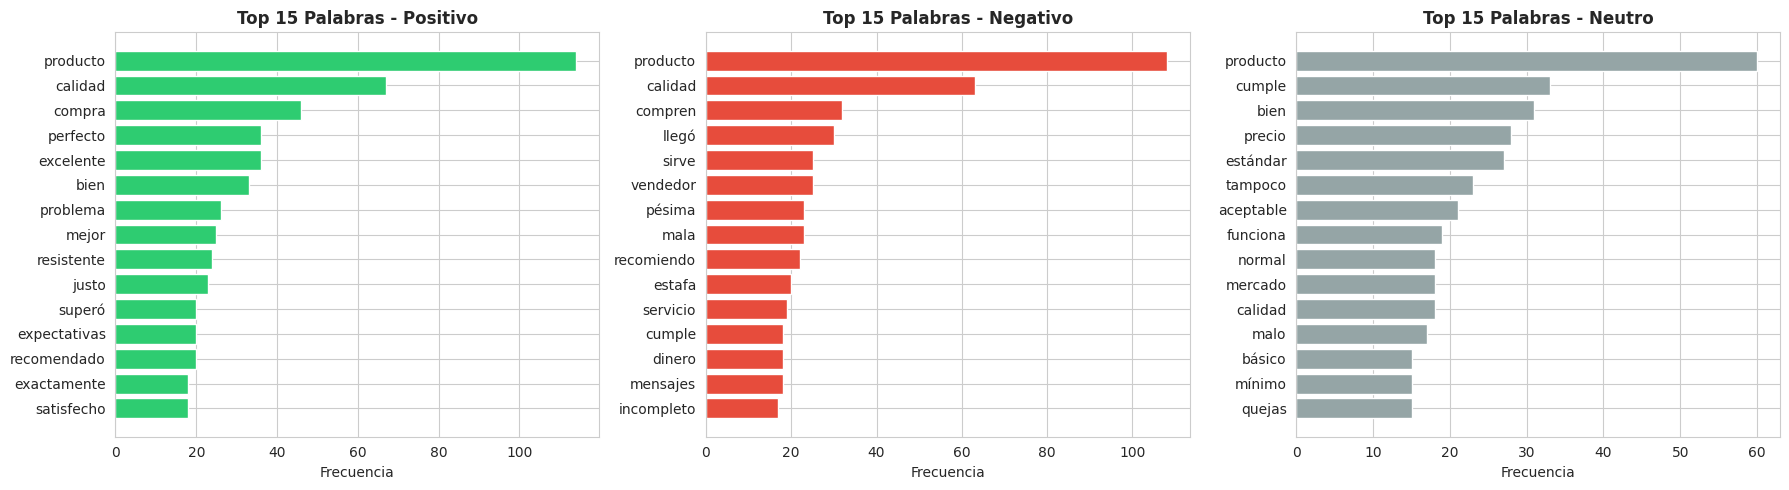


✅ Gráfico guardado: 'palabras_frecuentes.png'


In [29]:
print("\n" + "="*70)
print("📊 ANÁLISIS DE PALABRAS MÁS FRECUENTES")
print("="*70)

def obtener_palabras_frecuentes(df, sentimiento, top_n=20):
    """Obtiene las palabras más frecuentes por sentimiento"""
    textos = df[df['sentimiento'] == sentimiento]['texto_procesado']
    todas_palabras = ' '.join(textos).split()
    return Counter(todas_palabras).most_common(top_n)

# Analizar cada sentimiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, sentimiento in enumerate(['positivo', 'negativo', 'neutro']):
    palabras_freq = obtener_palabras_frecuentes(df, sentimiento, top_n=15)

    print(f"\n🔹 TOP 15 PALABRAS - {sentimiento.upper()}:")
    for palabra, freq in palabras_freq:
        print(f"   {palabra}: {freq}")

    # Visualización
    palabras, frecuencias = zip(*palabras_freq)
    axes[idx].barh(palabras, frecuencias, color=['#2ecc71', '#e74c3c', '#95a5a6'][idx])
    axes[idx].set_title(f'Top 15 Palabras - {sentimiento.capitalize()}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frecuencia', fontsize=10)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.savefig('palabras_frecuentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'palabras_frecuentes.png'")


# 9-  GUARDAR DATOS PROCESADOS

In [42]:
print("\n" + "="*70)
print("💾 GUARDANDO DATOS PROCESADOS")
print("="*70)

# Seleccionar columnas importantes
df_procesado = df[['id', 'texto', 'texto_procesado', 'sentimiento',
                    'longitud_caracteres', 'longitud_palabras']]

# Guardar CSV procesado
archivo_procesado = 'dataset_procesado.csv'
df_procesado.to_csv(archivo_procesado, index=False, encoding='utf-8')

print(f"✅ Archivo guardado: {archivo_procesado}")
print(f"📊 Dimensiones: {df_procesado.shape}")

# Mostrar resumen final
print("\n📋 RESUMEN DEL PROCESAMIENTO:")
print("="*70)
print(f"✓ Total de registros: {len(df_procesado)}")
print(f"✓ Sentimientos únicos: {df_procesado['sentimiento'].nunique()}")
print(f"✓ Longitud promedio (palabras): {df_procesado['longitud_palabras'].mean():.1f}")
print(f"✓ Textos procesados correctamente: {(df_procesado['texto_procesado'].str.len() > 0).sum()}")

print("\n" + "="*70)
print("🎉 NOTEBOOK 1 COMPLETADO")
print("="*70)
print("\n📌 PRÓXIMO PASO:")
print("   Ejecutar Base_Sentim_25 2: Entrenamiento del Modelo")
print("="*70)


💾 GUARDANDO DATOS PROCESADOS
✅ Archivo guardado: dataset_procesado.csv
📊 Dimensiones: (1000, 6)

📋 RESUMEN DEL PROCESAMIENTO:
✓ Total de registros: 1000
✓ Sentimientos únicos: 3
✓ Longitud promedio (palabras): 6.3
✓ Textos procesados correctamente: 1000

🎉 NOTEBOOK 1 COMPLETADO

📌 PRÓXIMO PASO:
   Ejecutar Base_Sentim_25 2: Entrenamiento del Modelo


# IMPORTAR LIBRERÍAS - ENTRENAMIENTO #  

In [31]:
print("📦 Importando librerías...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
import warnings
from datetime import datetime

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Librerías importadas correctamente")

📦 Importando librerías...
✅ Librerías importadas correctamente


# CARGAR DATOS PROCESADOS #

In [32]:
print("\n" + "="*70)
print("📂 CARGANDO DATOS PROCESADOS")
print("="*70)

try:
    df = pd.read_csv('dataset_procesado.csv')
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape}")
    print(f"\n📋 Columnas disponibles: {list(df.columns)}")
except FileNotFoundError:
    print("❌ ERROR: Ejecuta primero el Notebook 1")
    raise

# Verificar datos
print(f"\n📊 Distribución de sentimientos:")
print(df['sentimiento'].value_counts())


📂 CARGANDO DATOS PROCESADOS
✅ Dataset cargado exitosamente
📊 Dimensiones: (1000, 6)

📋 Columnas disponibles: ['id', 'texto', 'texto_procesado', 'sentimiento', 'longitud_caracteres', 'longitud_palabras']

📊 Distribución de sentimientos:
sentimiento
positivo    400
negativo    350
neutro      250
Name: count, dtype: int64


# PREPARACIÓN DE DATOS PARA ENTRENAMIENTO #

In [33]:
print("\n" + "="*70)
print("🔧 PREPARACIÓN DE DATOS")
print("="*70)

# Separar features (X) y target (y)
X = df['texto_procesado']
y = df['sentimiento']

print(f"📊 Total de muestras: {len(X)}")
print(f"📊 Distribución de clases:")
print(y.value_counts())

# División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantiene la proporción de clases
)

print(f"\n✅ División completada:")
print(f"   📈 Entrenamiento: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   📉 Prueba: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n📊 Distribución en entrenamiento:")
print(y_train.value_counts())
print(f"\n📊 Distribución en prueba:")
print(y_test.value_counts())



🔧 PREPARACIÓN DE DATOS
📊 Total de muestras: 1000
📊 Distribución de clases:
sentimiento
positivo    400
negativo    350
neutro      250
Name: count, dtype: int64

✅ División completada:
   📈 Entrenamiento: 800 muestras (80.0%)
   📉 Prueba: 200 muestras (20.0%)

📊 Distribución en entrenamiento:
sentimiento
positivo    320
negativo    280
neutro      200
Name: count, dtype: int64

📊 Distribución en prueba:
sentimiento
positivo    80
negativo    70
neutro      50
Name: count, dtype: int64


# VECTORIZACIÓN CON TF-IDF #

In [34]:
print("\n" + "="*70)
print("🔢 VECTORIZACIÓN DE TEXTOS (TF-IDF)")
print("="*70)

# Crear vectorizador TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,      # Máximo 5000 palabras más importantes
    ngram_range=(1, 2),     # Unigramas y bigramas
    min_df=2,               # Palabra debe aparecer en al menos 2 documentos
    max_df=0.8,             # Palabra no debe aparecer en más del 80% de documentos
    sublinear_tf=True       # Aplicar escala logarítmica a frecuencias
)

print("🔄 Ajustando vectorizador y transformando datos...")

# Ajustar con datos de entrenamiento y transformar
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"\n✅ Vectorización completada:")
print(f"   📊 Forma de matriz de entrenamiento: {X_train_tfidf.shape}")
print(f"   📊 Forma de matriz de prueba: {X_test_tfidf.shape}")
print(f"   📊 Vocabulario total: {len(vectorizer.vocabulary_)} palabras")
print(f"   📊 Densidad de matriz: {(X_train_tfidf.nnz / np.prod(X_train_tfidf.shape) * 100):.2f}%")

# Mostrar palabras más importantes
print(f"\n🔤 TOP 20 PALABRAS DEL VOCABULARIO:")
vocab_items = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])[:20]
for palabra, idx in vocab_items:
    print(f"   {idx}: {palabra}")


🔢 VECTORIZACIÓN DE TEXTOS (TF-IDF)
🔄 Ajustando vectorizador y transformando datos...

✅ Vectorización completada:
   📊 Forma de matriz de entrenamiento: (800, 538)
   📊 Forma de matriz de prueba: (200, 538)
   📊 Vocabulario total: 538 palabras
   📊 Densidad de matriz: 1.15%

🔤 TOP 20 PALABRAS DEL VOCABULARIO:
   0: absolutamente
   1: acabado
   2: acabado presentación
   3: aceptable
   4: aceptable mejorable
   5: aceptable podría
   6: aceptable precio
   7: acorde
   8: acorde ofrece
   9: actualmente
   10: alta
   11: alta calidad
   12: anunciadas
   13: aquí
   14: arrepentirán
   15: arrepiento
   16: arrepiento emocionado
   17: aspectos
   18: atención
   19: atención detalle


# COMPARACIÓN DE MODELOS #


🤖 COMPARACIÓN DE MODELOS

🔄 Entrenando: Logistic Regression
✅ Métricas:
   Accuracy:  0.9850
   Precision: 0.9853
   Recall:    0.9850
   F1-Score:  0.9848

🔄 Entrenando: Naive Bayes
✅ Métricas:
   Accuracy:  0.9850
   Precision: 0.9853
   Recall:    0.9850
   F1-Score:  0.9848

🔄 Entrenando: Random Forest
✅ Métricas:
   Accuracy:  0.9400
   Precision: 0.9488
   Recall:    0.9400
   F1-Score:  0.9408

📊 COMPARACIÓN FINAL DE MODELOS
                    accuracy precision recall  f1_score
Logistic Regression    0.985  0.985314  0.985  0.984848
Naive Bayes            0.985  0.985314  0.985  0.984848
Random Forest           0.94   0.94878   0.94  0.940827


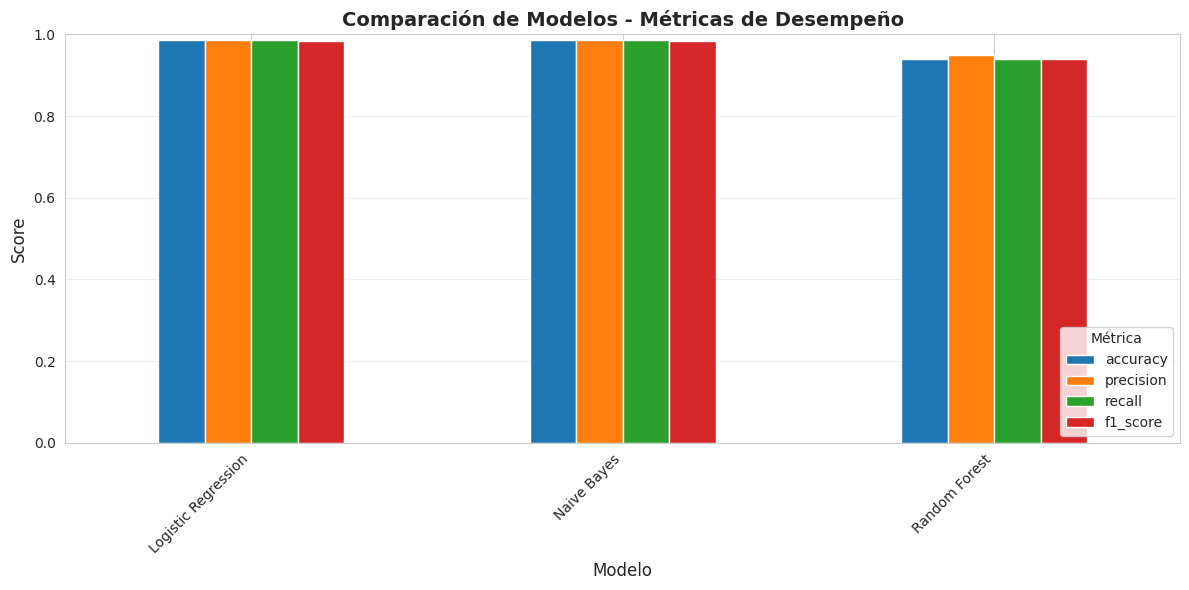


🏆 MEJOR MODELO: Logistic Regression
   F1-Score: 0.9848


In [35]:
print("\n" + "="*70)
print("🤖 COMPARACIÓN DE MODELOS")
print("="*70)

# Definir modelos a probar
modelos = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        solver='saga'
    ),
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        random_state=42,
        class_weight='balanced'
    )
}

# Entrenar y evaluar cada modelo
resultados = {}

for nombre, modelo in modelos.items():
    print(f"\n{'='*70}")
    print(f"🔄 Entrenando: {nombre}")
    print(f"{'='*70}")

    # Entrenar
    modelo.fit(X_train_tfidf, y_train)

    # Predecir
    y_pred = modelo.predict(X_test_tfidf)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar resultados
    resultados[nombre] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'modelo': modelo
    }

    print(f"✅ Métricas:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

# Comparación visual
print(f"\n{'='*70}")
print("📊 COMPARACIÓN FINAL DE MODELOS")
print(f"{'='*70}")

df_resultados = pd.DataFrame(resultados).T
df_resultados = df_resultados.drop('modelo', axis=1)
print(df_resultados)

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(12, 6))
df_resultados.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Modelos - Métricas de Desempeño',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Métrica', loc='lower right')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

# Seleccionar mejor modelo
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['f1_score'])
mejor_modelo = resultados[mejor_modelo_nombre]['modelo']

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_nombre}")
print(f"   F1-Score: {resultados[mejor_modelo_nombre]['f1_score']:.4f}")


# EVALUACIÓN DETALLADA DEL MEJOR MODELO #


📈 EVALUACIÓN DETALLADA: Logistic Regression

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    negativo     0.9859    1.0000    0.9929        70
      neutro     1.0000    0.9400    0.9691        50
    positivo     0.9756    1.0000    0.9877        80

    accuracy                         0.9850       200
   macro avg     0.9872    0.9800    0.9832       200
weighted avg     0.9853    0.9850    0.9848       200



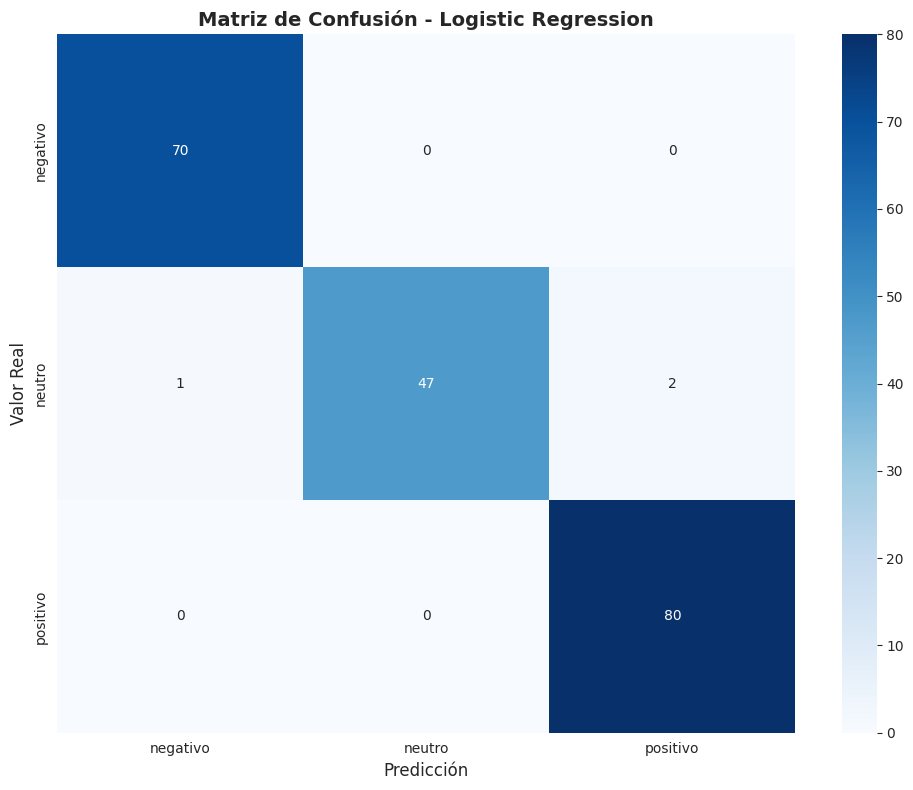


✅ Matriz de confusión guardada: 'matriz_confusion.png'


In [36]:
print("\n" + "="*70)
print(f"📈 EVALUACIÓN DETALLADA: {mejor_modelo_nombre}")
print("="*70)

# Predicciones finales
y_pred_final = mejor_modelo.predict(X_test_tfidf)
y_pred_proba = mejor_modelo.predict_proba(X_test_tfidf)

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print("="*70)
print(classification_report(y_test, y_pred_final, digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
labels = sorted(y_test.unique())

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title(f'Matriz de Confusión - {mejor_modelo_nombre}',
             fontsize=14, fontweight='bold')
ax.set_ylabel('Valor Real', fontsize=12)
ax.set_xlabel('Predicción', fontsize=12)

plt.tight_layout()
plt.savefig('matriz_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Matriz de confusión guardada: 'matriz_confusion.png'")

# ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES #

In [37]:
print("\n" + "="*70)
print("🔍 ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES")
print("="*70)

# Obtener características importantes (solo para Logistic Regression)
if isinstance(mejor_modelo, LogisticRegression):
    feature_names = vectorizer.get_feature_names_out()

    for idx, clase in enumerate(mejor_modelo.classes_):
        print(f"\n📊 TOP 15 PALABRAS MÁS INFLUYENTES - {clase.upper()}:")
        coef = mejor_modelo.coef_[idx]
        top_indices = np.argsort(coef)[-15:][::-1]

        for i, feature_idx in enumerate(top_indices, 1):
            print(f"   {i}. {feature_names[feature_idx]}: {coef[feature_idx]:.4f}")



🔍 ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES

📊 TOP 15 PALABRAS MÁS INFLUYENTES - NEGATIVO:
   1. compren: 1.2079
   2. pésima: 1.0481
   3. mala: 0.9566
   4. dinero: 0.9289
   5. total: 0.9137
   6. mensajes: 0.8708
   7. sirve: 0.8348
   8. sirve absolutamente: 0.8130
   9. absolutamente: 0.8130
   10. experiencia: 0.7975
   11. peor producto: 0.7808
   12. peor: 0.7808
   13. defectuoso: 0.7670
   14. estafa: 0.7666
   15. dañado: 0.7663

📊 TOP 15 PALABRAS MÁS INFLUYENTES - NEUTRO:
   1. estándar: 1.5225
   2. aceptable: 1.4263
   3. esperaba menos: 1.3917
   4. menos: 1.3917
   5. tampoco: 1.3874
   6. precio: 1.2827
   7. normal: 1.2654
   8. bien: 1.2041
   9. común: 1.1241
   10. cumple: 1.0248
   11. cosa funciona: 0.9693
   12. gran: 0.9693
   13. gran cosa: 0.9693
   14. cosa: 0.9693
   15. mercado: 0.9453

📊 TOP 15 PALABRAS MÁS INFLUYENTES - POSITIVO:
   1. compra: 1.4452
   2. excelente: 1.3671
   3. perfecto: 1.2653
   4. superó: 0.9854
   5. superó expectativas: 0.9854
   

# VALIDACIÓN CRUZADA #

In [38]:
print("\n" + "="*70)
print("🔄 VALIDACIÓN CRUZADA (5-FOLD)")
print("="*70)

cv_scores = cross_val_score(
    mejor_modelo,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='f1_weighted'
)

print(f"📊 Scores de validación cruzada:")
for i, score in enumerate(cv_scores, 1):
    print(f"   Fold {i}: {score:.4f}")

print(f"\n📊 Promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



🔄 VALIDACIÓN CRUZADA (5-FOLD)
📊 Scores de validación cruzada:
   Fold 1: 1.0000
   Fold 2: 1.0000
   Fold 3: 1.0000
   Fold 4: 1.0000
   Fold 5: 0.9750

📊 Promedio: 0.9950 (+/- 0.0200)


# PRUEBAS CON EJEMPLOS REALES #

In [39]:
print("\n" + "="*70)
print("🧪 PRUEBAS CON EJEMPLOS REALES")
print("="*70)

ejemplos_prueba = [
    "Este producto es excelente, superó todas mis expectativas",
    "Pésimo servicio, no lo recomiendo para nada",
    "Es un producto normal, cumple su función básica",
    "Muy satisfecho con la compra, llegó rápido",
    "Terrible calidad, se rompió al primer uso",
]

print("\n📝 Predicciones:")
for i, texto in enumerate(ejemplos_prueba, 1):
    # Preprocesar (simplificado)
    texto_limpio = texto.lower()
    texto_vec = vectorizer.transform([texto_limpio])

    # Predecir
    prediccion = mejor_modelo.predict(texto_vec)[0]
    probabilidad = mejor_modelo.predict_proba(texto_vec).max()

    print(f"\n{i}. Texto: '{texto}'")
    print(f"   ➜ Predicción: {prediccion}")
    print(f"   ➜ Confianza: {probabilidad:.2%}")



🧪 PRUEBAS CON EJEMPLOS REALES

📝 Predicciones:

1. Texto: 'Este producto es excelente, superó todas mis expectativas'
   ➜ Predicción: positivo
   ➜ Confianza: 84.21%

2. Texto: 'Pésimo servicio, no lo recomiendo para nada'
   ➜ Predicción: negativo
   ➜ Confianza: 67.50%

3. Texto: 'Es un producto normal, cumple su función básica'
   ➜ Predicción: neutro
   ➜ Confianza: 85.44%

4. Texto: 'Muy satisfecho con la compra, llegó rápido'
   ➜ Predicción: positivo
   ➜ Confianza: 78.76%

5. Texto: 'Terrible calidad, se rompió al primer uso'
   ➜ Predicción: negativo
   ➜ Confianza: 70.51%


# GUARDAR MODELO Y ARTEFACTOS #

In [40]:
print("\n" + "="*70)
print("💾 GUARDANDO MODELO Y ARTEFACTOS PARA BACKEND")
print("="*70)

# 1. Guardar modelo
modelo_filename = 'sentiment_model.pkl'
joblib.dump(mejor_modelo, modelo_filename)
print(f"✅ Modelo guardado: {modelo_filename}")

# 2. Guardar vectorizador
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print(f"✅ Vectorizador guardado: {vectorizer_filename}")

# 3. Crear metadata del modelo
metadata = {
    'modelo': mejor_modelo_nombre,
    'fecha_entrenamiento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metricas': {
        'accuracy': float(resultados[mejor_modelo_nombre]['accuracy']),
        'precision': float(resultados[mejor_modelo_nombre]['precision']),
        'recall': float(resultados[mejor_modelo_nombre]['recall']),
        'f1_score': float(resultados[mejor_modelo_nombre]['f1_score'])
    },
    'datos': {
        'total_muestras': int(len(df)),
        'muestras_entrenamiento': int(len(X_train)),
        'muestras_prueba': int(len(X_test))
    },
    'clases': list(mejor_modelo.classes_),
    'vocabulario_size': int(len(vectorizer.vocabulary_)),
    'parametros_tfidf': {
        'max_features': 5000,
        'ngram_range': [1, 2],
        'min_df': 2,
        'max_df': 0.8
    },
    'version': '1.0.0',
    'equipo': 'Data Science Team'
}

metadata_filename = 'model_metadata.json'
with open(metadata_filename, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)
print(f"✅ Metadata guardada: {metadata_filename}")

# 4. Crear archivo de ejemplo para Backend
ejemplo_api = {
    'endpoint': '/sentiment',
    'method': 'POST',
    'request_body': {
        'text': 'Este producto es excelente'
    },
    'response_body': {
        'prevision': 'positivo',
        'probabilidad': 0.87
    },
    'status_codes': {
        '200': 'Éxito',
        '400': 'Error en el request (texto vacío o inválido)',
        '500': 'Error interno del servidor'
    }
}

ejemplo_filename = 'api_contract.json'
with open(ejemplo_filename, 'w', encoding='utf-8') as f:
    json.dump(ejemplo_api, f, indent=4, ensure_ascii=False)
print(f"✅ Contrato API guardado: {ejemplo_filename}")


💾 GUARDANDO MODELO Y ARTEFACTOS PARA BACKEND
✅ Modelo guardado: sentiment_model.pkl
✅ Vectorizador guardado: tfidf_vectorizer.pkl
✅ Metadata guardada: model_metadata.json
✅ Contrato API guardado: api_contract.json


# DESCARGAR ARTEFACTOS #

In [41]:
print("\n" + "="*70)
print("📥 DESCARGAR ARTEFACTOS PARA ENTREGAR A BACKEND")
print("="*70)

from google.colab import files

archivos_a_descargar = [
    modelo_filename,
    vectorizer_filename,
    metadata_filename,
    ejemplo_filename,
    'comparacion_modelos.png',
    'matriz_confusion.png'
]

print("🔄 Descargando archivos...")
for archivo in archivos_a_descargar:
    try:
        files.download(archivo)
        print(f"   ✅ {archivo}")
    except:
        print(f"   ⚠️  No se pudo descargar: {archivo}")

print("\n" + "="*70)
print("🎉 NOTEBOOK 2 COMPLETADO")
print("="*70)
print("\n📦 ENTREGABLES PARA BACKEND:")
print("   1. sentiment_model.pkl")
print("   2. tfidf_vectorizer.pkl")
print("   3. model_metadata.json")
print("   4. api_contract.json")
print("\n📊 DOCUMENTACIÓN:")
print("   5. comparacion_modelos.png")
print("   6. matriz_confusion.png")
print("="*70)


📥 DESCARGAR ARTEFACTOS PARA ENTREGAR A BACKEND
🔄 Descargando archivos...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ sentiment_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ tfidf_vectorizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ model_metadata.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ api_contract.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ comparacion_modelos.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ matriz_confusion.png

🎉 NOTEBOOK 2 COMPLETADO

📦 ENTREGABLES PARA BACKEND:
   1. sentiment_model.pkl
   2. tfidf_vectorizer.pkl
   3. model_metadata.json
   4. api_contract.json

📊 DOCUMENTACIÓN:
   5. comparacion_modelos.png
   6. matriz_confusion.png
